# Classes and Functions

Execute all cells.

In [ ]:
import random

class Grid_Environment:
    def __init__ (self, X, Y):
        self.X = X
        self.Y = Y
        self.state = (1,1)
        self.goal = (X,Y)

        states = []
        for x in range(X):
            for y in range(Y):
                states = states + [(x+1,y+1)]
        self.states = (*states, )

        self.actions = ('w', 's', 'd', 'a' )

    moveAction = {
        'w': (0,1),
        's': (0,-1),
        'd': (1,0),
        'a': (-1,0)
    }

    def reset(self):
        self.state = (1,1)

    def move(self,state,shift):
        x = min(max(state[0] + shift[0],1),self.X)
        y = min(max(state[1] + shift[1],1),self.Y)
        return (x,y)


    def reward(self,state, action):
        if state == self.goal:
            return 0
        else:
            return -1

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        next = self.move(state,self.moveAction[action])
        nextStates[next] = 1.0

        return nextStates

    def simulateStep(self,state,action):
        r = self.reward(state, action)
        nextStates = self.nextState(state,action)
        return random.choices( list( nextStates.keys() ), weights = list( nextStates.values() ), k=1 )[0], r


    def step(self,action):
        self.state, r  = self.simulateStep(self.state,action)
        return self.state, r

    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridWind_Environment(Grid_Environment):
    windUp = (0,1)
    windDown = (0,-1)
    windLeft = (-1,0)

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if state[0]/self.X >= 0.5 and state[0] < self.X and state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 0.5

          next = self.move(state,self.moveAction['w'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] = 0.25

          next = self.move(state,self.moveAction['a'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25

        elif state[0]/self.X <= 0.5 and state[0] > 1 and state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 0.5

          next = self.move(state,self.moveAction['s'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25

          next = self.move(state,self.moveAction['a'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25
        else:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 1.0


        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                elif i/self.X >= 0.5 and i < self.X and j/self.Y > 0.5:
                    print('$',end='')
                elif i/self.X <= 0.5 and i > 1 and j/self.Y <= 0.5:
                    print('#',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridQuad_Environment(Grid_Environment):
    Q1 = { 'a' : 'd', 's' : 'w' , 'd' : 'a', 'w':'s' }
    Q2 = { 'a' : 'w', 's' : 'a' , 'd' : 's', 'w':'d' }
    Q3 = { 'a' : 'w', 's' : 'd' , 'd' : 'a', 'w':'s' }
    Q4 = { 'a' : 's', 's' : 'd' , 'd' : 'w', 'w':'a' }

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if self.state[0]/self.X <= 0.5 and self.state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[self.Q2[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.5 and self.state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[self.Q3[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X <= 0.5 and self.state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[self.Q4[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.5 and self.state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[self.Q1[action]])
          nextStates[next] = 1.0

        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                elif i/self.X <= 0.5 and j/self.Y <= 0.5:
                    print('$',end='')
                elif i/self.X > 0.5 and j/self.Y <= 0.5:
                    print('#',end='')
                elif i/self.X <= 0.5 and j/self.Y > 0.5:
                    print('@',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridQuadInv_Environment(Grid_Environment):
    Q1 = { 'a' : 'd', 's' : 'w' , 'd' : 'a', 'w':'s' }
    Q2 = { 'a' : 'w', 's' : 'a' , 'd' : 's', 'w':'d' }
    Q3 = { 'a' : 'w', 's' : 'd' , 'd' : 'a', 'w':'s' }
    Q4 = { 'a' : 's', 's' : 'd' , 'd' : 'w', 'w':'a' }

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if self.state[0]/self.X <= 0.3 and self.state[1]/self.Y <= 0.3:
          next = self.move(state,self.moveAction[self.Q3[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.3 and self.state[1]/self.Y <= 0.3:
          next = self.move(state,self.moveAction[self.Q4[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X <= 0.3 and self.state[1]/self.Y > 0.3:
          next = self.move(state,self.moveAction[self.Q1[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.3 and self.state[1]/self.Y > 0.3:
          next = self.move(state,self.moveAction[self.Q2[action]])
          nextStates[next] = 1.0

        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                # elif i/self.X <= 0.3 and j/self.Y <= 0.3:
                #     print('$',end='')
                # elif i/self.X > 0.3 and j/self.Y <= 0.3:
                #     print('#',end='')
                # elif i/self.X <= 0.3 and j/self.Y > 0.3:
                #     print('@',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
import time
import numpy as np
from IPython.display import clear_output

def Simulate(env,maxSteps):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  while steps < maxSteps:

      breakSignal = False
      command = input("Write 'w', 'a', 's', 'd' to move: ")
      for a in command:
        s = env.state
        if s == env.goal:
            breakSignal = True
            break
        if a in ['w', 'a', 's', 'd']:
            env.step(a)
            steps += 1

        clear_output(wait=True)
        env.render()
        time.sleep(tempo)
      if env.state == env.goal or breakSignal:
        break

  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
    input("Press enter to go to the next task.")
  else:
    print(f"You fail to reach the goal.")
    input("Press enter to go to the next task.")

  return steps

def EvaluatePolicyMC(env,policy,maxSteps,nSamples):

  memSteps = []
  memGoals = []

  for i in range(nSamples):
    env.reset()
    steps = 0

    while steps < maxSteps:
      s = env.state
      a = policy[s]
      if s == env.goal:
          break
      if a in ['w', 'a', 's', 'd']:
          env.step(a)
          steps += 1

    if env.state == env.goal:
      memGoals = memGoals + [1]
      memSteps = memSteps + [steps]
    else:
      memGoals = memGoals + [0]


    clear_output(wait=True)
    print(f'Simulating {(i+1)/nSamples}')

  print(f'The goal was rechead {100*np.mean(memGoals)}% of the simulations.')
  if len(memSteps) > 0:
    print(f'The average steps in simulations that rechead the goal was {np.mean(memSteps)}.')

  return memSteps, memGoals

def SimulatePolicy(env,policy,maxSteps):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  while steps < maxSteps:
    s = env.state
    a = policy[s]
    if s == env.goal:
        break
    if a in ['w', 'a', 's', 'd']:
        env.step(a)
        steps += 1

    clear_output(wait=True)
    env.render()
    time.sleep(tempo)
  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
  else:
    print(f"You fail to reach the goal.")

  return steps

def SimulatePlan(env,plan):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  for a in plan:
    s = env.state
    if s == env.goal:
        break
    if a in ['w', 'a', 's', 'd']:
        env.step(a)
        steps += 1

    clear_output(wait=True)
    env.render()
    time.sleep(tempo)
  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
  else:
    print(f"You fail to reach the goal.")

  return steps

# Execution 1: Monte Carlo Evaluation


Expand the cells, before executing them.

In [ ]:
def renderPolicy(env,policy):
  print('')
  for j in range(env.Y,0,-1):
      for i in range(1,env.X+1):
          if policy[(i,j)] == 'a':
              print('<',end='')
          elif policy[(i,j)] == 's':
              print('v',end='')
          elif policy[(i,j)] == 'd':
              print('>',end='')
          elif policy[(i,j)] == 'w':
              print('^',end='')
          else:
              print('*',end='')
      print('')

In [ ]:
nX = 20
nY = 10

env = GridWind_Environment(nX,nY)

maxSteps = 100

policy = {}

for s in env.states:
  policy[s] = 'd'

for j in range(1,env.Y+1):
  policy[(env.X,j)] = 'w'

renderPolicy(env,policy)




>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>>^


In [ ]:

eval = SimulatePolicy(env, policy, maxSteps)


*********$$$$$$$$$$A
*********$$$$$$$$$$*
*********$$$$$$$$$$*
*********$$$$$$$$$$*
*********$$$$$$$$$$*
*#########**********
*#########**********
*#########**********
*#########**********
*#########**********
Congratulations. You spent 51 steps to reach the Goal.


Evaluate the previously defined policy with Monte Carlo simulation.

In [ ]:
maxSteps = 100
nSamples = 1000
s,g = EvaluatePolicyMC(env, policy, maxSteps, nSamples);

Simulating 1.0
The goal was rechead 98.9% of the simulations.
The average steps in simulations that rechead the goal was 51.346814964610715.


# Execution 2: Analytically Policy Evaluation

Expand the cells, before executing them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def policy_evaluation(Environment,pi, gamma, epsilon):
    V = {}
    for s in Environment.states:
        V[s] = 0

    res = float('inf')

    resolution = 10;

    steps = 0

    while res > epsilon:
        V_old = V.copy()
        res = 0

        for s in Environment.states:
            V[s] = Environment.reward(s,pi[s])
            Transitions = Environment.nextState(s,pi[s])
            for ss in Transitions:
                V[s] = V[s] + gamma*Transitions[ss]*V_old[ss]

            if abs(V[s] - V_old[s]) > res:
                res = abs(V[s] - V_old[s])


        steps += 1
        if steps % resolution == 0:
            clear_output(wait=True)
            print(f'Residual {res}')

    return V[Environment.state], V

def drawValues(env,V):
    img = np.zeros((env.Y,env.X))
    for j in range(1,env.Y+1):
      for i in range(1,env.X+1):
        img[env.Y - j,i-1] = V[(i,j)]
    plt.imshow(img, cmap='gray', vmin=min(V.values()), vmax=max(V.values()))
    plt.show()

Residual 1.2927614534419263e-10


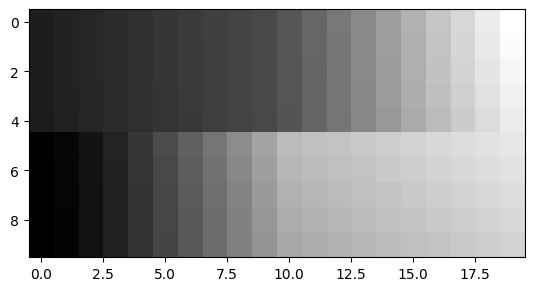

The expected cumulative reward is -52.005859374440575.


In [ ]:
gamma = 1
epsilon = 0.0000000001
env = GridWind_Environment(nX,nY)
eval, V = policy_evaluation(env,policy, gamma, epsilon)

drawValues(env,V)
print(f'The expected cumulative reward is {eval}.')

# Execution 3: Evaluation of Uniform Random Policy

Expand cells before executing.

In [ ]:
def random_evaluation(Environment, gamma, epsilon):
    V = {}
    for s in Environment.states:
        V[s] = 0

    res = float('inf')

    count = 0

    resolution = 100
    steps = 0


    while res > epsilon:
        V_old = V.copy()
        res = 0

        for s in Environment.states:
          V[s] = 0
          for a in Environment.actions:
            Transitions = Environment.nextState(s,a)
            for ss in Transitions:
                V[s] = V[s] + 1/len(Environment.actions)*Transitions[ss]*( Environment.reward(s,a) +  gamma*V_old[ss])

          if abs(V[s] - V_old[s]) > res:
                res = abs(V[s] - V_old[s])

        steps += 1
        if steps % resolution == 0:
          clear_output(wait=True)
          print(f'Residual {res}')

    img = np.zeros((env.Y,env.X))
    for j in range(1,env.Y+1):
      for i in range(1,env.X+1):
        img[env.Y - j,i-1] = V[(i,j)]
    plt.imshow(img, cmap='gray', vmin=min(V.values()), vmax=max(V.values()))
    plt.show()

    return V[Environment.state]

Residual 0.1002076012919133


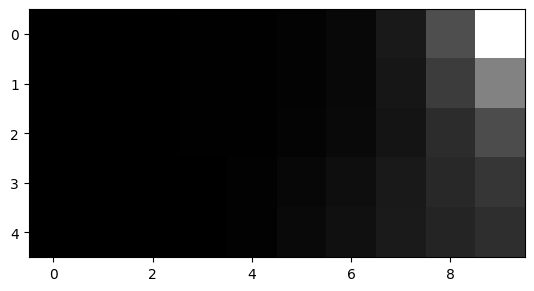

The expected cumulative reward is -11174.915382245068.


In [ ]:
gamma = 1
epsilon = 0.1
env = GridWind_Environment(10,5)
eval = random_evaluation(env,gamma, epsilon)

print(f'The expected cumulative reward is {eval}.')

# Execution 4: Policy Iteration

Expand the cells before executing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def policy_evaluation(Environment,pi, gamma, epsilon):
    V = {}
    for s in Environment.states:
        V[s] = 0

    res = float('inf')

    while res > epsilon:
        V_old = V.copy()
        res = 0

        for s in Environment.states:
            V[s] = Environment.reward(s,pi[s])
            Transitions = Environment.nextState(s,pi[s])
            for ss in Transitions:
                V[s] = V[s] + gamma*Transitions[ss]*V_old[ss]

            if abs(V[s] - V_old[s]) > res:
                res = abs(V[s] - V_old[s])

    return V

def policy_improvement(Environment,V, gamma):
    pi = {}
    for s in Environment.states:
        Q = {}
        for a in Environment.actions:
            Q[a] = Environment.reward(s,a)
            Transitions = Environment.nextState(s,a)
            for ss in Transitions:
                Q[a] = Q[a] + gamma*Transitions[ss]*V[ss]

        pi[s] = max(Q, key=Q.get)
    return pi

def policy_iteration(Environment, gamma, eps):

    res = 10

    policy = {}
    for s in Environment.states:
      policy[s] = 'd';

    V = policy_evaluation(Environment, policy, gamma, eps)

    renderPolicy(Environment,policy)

    input(f'O valor da política é {V[(1,1)]}. Pressione enter para continuar.')

    while res > eps:
        policy = policy_improvement(Environment,V, gamma)
        V_old = V.copy()
        V = policy_evaluation(Environment, policy, gamma, eps)

        res = np.max(  np.abs( np.array(list(V.values())) -  np.array(list(V_old.values())) ) )

        print(f'Residual {res}')

        # clear_output(wait=True)
        renderPolicy(Environment,policy)

        print(f'O valor da política é {V[(1,1)]}.')
        print(f'O valor da política é {np.mean(list(V.values()))}.')
        input(f'Pressione enter para continuar.')

    return policy



In [ ]:
gamma = 0.999
eps = 0.001
env = GridWind_Environment(30,15)

policy_iteration(env,gamma,eps);


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
O valor da política é -999.0016985805198. Pressione enter para continuar.
Residual 998.0016985805198

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>^
>>>>>>>>>>>>>>>>>>^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^<
^^^^^^^^^^^^^^^^^^^^^^^^^^^<<<
^^^^^^^^^^^^^^^^^^^^^^^^^^<<<<
^^^^^^^^^^^^^^^^^^^^^^^^^<<<<<
^^^^^^^^^^^^^^^^^^^^^^^^<<<<<<
^^^^^^^^^^^^^^^^^^^^^^^<<<<<<<
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Execution 5: Value Iteration

Expand the cells before executing.

In [ ]:
def value_iteration(Environment,gamma, eps):
    V = {}
    for s in Environment.states:
        V[s] = 0

    res = float('inf')

    if gamma < 1:
        epsilon = eps*(1-gamma)/(2*gamma)
    else:
        epsilon = eps

    while res > epsilon:
        V_old = V.copy()
        res = 0

#       Encontra a função valor epsilon-ótima
        for s in Environment.states:
            Q = {}
            for a in Environment.actions:
                Q[a] = Environment.reward(s,a)
                Transitions = Environment.nextState(s,a)
                for ss in Transitions:
                    Q[a] = Q[a] + gamma*Transitions[ss]*V_old[ss]

            V[s] = max(Q.values())

            if abs(V[s] - V_old[s]) > res:
                res = abs(V[s] - V_old[s])

#   Extrai a política epsilon-ótima
    pi = {}
    for s in Environment.states:
        Q = {}
        for a in Environment.actions:
            Q[a] = Environment.reward(s,a)
            Transitions = Environment.nextState(s,a)
            for ss in Transitions:
                Q[a] = Q[a] + gamma*Transitions[ss]*V[ss]

        pi[s] = max(Q, key=Q.get)


    return pi, V[Environment.state]

In [ ]:
gamma = 0.999
epsilon = 0.000001
env = GridWind_Environment(30,15)
policy, eval = value_iteration(env,gamma, epsilon)
renderPolicy(env,policy)
print(f'O valor da política é {eval}. Pressione enter para continuar.')


vvvvvvvvvvvvvv<<<>>>>>>>>>>>>^
vvvvvvvvvvvvvv<<<>>>>>>>>>>>>^
vvvvvvvvvvvvvv<<vv>>>>>>>>>>>^
vvvvvvvvvvvvvv<<vvv>>>>>>>>>>^
vvvvvvvvvvvvvv<vvvvvv>>>>>>>>^
vvvvvvvvvvvvvvvvvvvvvvv>>>>>>^
vvvvvvvvvvvvvvvvvvvvvvvvv>>>>^
>>>>>>>>>>>>>>vvvvvvvvvvvvv>>^
^^^^^^^^^^^^>>>>>>>>>>>>>>>>>^
^^^^^^^^^^^>>>>^^^^^^^^^^^^^^^
^<^^^^^^^^>>>>>^^^^^^^^^^^^^^^
^<<^^^^^^>>>>>>^^^^^^^^^^^^^^^
^<<<^^^^>>>>>>>^^^^^^^^^^^^^^^
^<<<<<^>>>>>>>>^^^^^^^^^^^^^^^
^<<<<<>>>>>>>>>^^^^^^^^^^^^^^^
O valor da política é -50.29277719551545. Pressione enter para continuar.
